In [1]:
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

import requests
import io

def get_data(url):
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
df = get_data("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [3]:
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1375,15-Jun-21,2021-06-15,Recovered,107767,15,10567,326,2906,813,58,...,1691,1006,272,23207,2070,743,1104,515,2068,0
1376,15-Jun-21,2021-06-15,Deceased,2540,0,53,4,34,9,3,...,48,14,3,267,14,4,56,25,75,0
1377,16-Jun-21,2021-06-16,Confirmed,67256,26,6617,250,3386,370,41,...,675,280,147,10448,1489,536,251,353,3187,0
1378,16-Jun-21,2021-06-16,Recovered,103853,30,10228,289,4881,730,63,...,1383,928,420,21058,1436,596,927,398,2012,0
1379,16-Jun-21,2021-06-16,Deceased,2329,1,57,0,36,9,2,...,48,9,1,270,11,5,49,12,69,0


In [4]:
df = df[df['Status']=='Confirmed']
df.head(-1)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,11-Jun-21,2021-06-11,Confirmed,84574,36,8239,358,3666,566,70,...,1201,446,147,15759,1707,641,596,287,4883,0
1365,12-Jun-21,2021-06-12,Confirmed,80525,10,6952,298,3463,432,58,...,961,368,167,15108,1771,428,504,463,4286,0
1368,13-Jun-21,2021-06-13,Confirmed,71001,18,6770,134,2167,487,54,...,956,308,157,14016,1280,565,452,263,3984,0
1371,14-Jun-21,2021-06-14,Confirmed,60008,8,4549,366,3678,324,50,...,622,277,36,12772,1511,235,313,296,3519,0


In [5]:
df = df.drop(['Status'], axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df.reset_index()
df = df.set_index("Date")
df

,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Date,,,,,,,,,,,,,,,,,,,,,
14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
15-Mar-20,2020-03-15,27,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
16-Mar-20,2020-03-16,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17-Mar-20,2020-03-17,11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
18-Mar-20,2020-03-18,37,0,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-Jun-21,2021-06-12,80525,10,6952,298,3463,432,58,813,5,...,961,368,167,15108,1771,428,504,463,4286,0
13-Jun-21,2021-06-13,71001,18,6770,134,2167,487,54,459,0,...,956,308,157,14016,1280,565,452,263,3984,0
14-Jun-21,2021-06-14,60008,8,4549,366,3678,324,50,600,1,...,622,277,36,12772,1511,235,313,296,3519,0


In [8]:
df['DL']

Date
14-Mar-20      7
15-Mar-20      0
16-Mar-20      0
17-Mar-20      1
18-Mar-20      2
            ... 
12-Jun-21    213
13-Jun-21    255
14-Jun-21    131
15-Jun-21    228
16-Jun-21    212
Name: DL, Length: 460, dtype: int64

In [9]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df.index,
                    y=df['DL'],
                    name = "daily confirmed cases DELHI"
        
                    )

layout = dict(title='Daily Confirm tOTAL DELHI',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [10]:
len(df)

460

In [11]:
close_data=df
len(close_data)

460

In [12]:
x=len(close_data)-60
x

400

In [13]:
close_data = df['DL'].values
close_data = close_data.reshape((-1,1))


close_train = close_data[:x]
close_test = close_data[x:]

date_train = df.index[:x]
date_test = df.index[x:]

print(len(close_train))
print(len(close_test))

400
60


In [14]:
close_data1 = df.drop(df.index[range(400)])
close_data1
close_data1=close_data1.drop(close_data1.index[-1])

In [15]:
close_data2=close_data1

In [16]:
close_data2
len(close_data2)
close_data2=close_data2['DL'].values
close_data2 = close_data2.reshape((-1,1))

In [17]:
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:

look_back = 1

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test,length=look_back, batch_size=20)


In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(40,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

num_epochs = 20 
model.fit(train_generator, epochs=num_epochs, verbose=2)


Epoch 1/20
20/20 - 0s - loss: 11900017.0000 - accuracy: 0.0100
Epoch 2/20
20/20 - 0s - loss: 11775343.0000 - accuracy: 0.0100
Epoch 3/20
20/20 - 0s - loss: 10632483.0000 - accuracy: 0.0100
Epoch 4/20
20/20 - 0s - loss: 10190087.0000 - accuracy: 0.0100
Epoch 5/20
20/20 - 0s - loss: 9947319.0000 - accuracy: 0.0100
Epoch 6/20
20/20 - 0s - loss: 9729236.0000 - accuracy: 0.0100
Epoch 7/20
20/20 - 0s - loss: 8682490.0000 - accuracy: 0.0050
Epoch 8/20
20/20 - 0s - loss: 7988629.0000 - accuracy: 0.0075
Epoch 9/20
20/20 - 0s - loss: 7518218.5000 - accuracy: 0.0075
Epoch 10/20
20/20 - 0s - loss: 7029588.5000 - accuracy: 0.0050
Epoch 11/20
20/20 - 0s - loss: 6587621.0000 - accuracy: 0.0050
Epoch 12/20
20/20 - 0s - loss: 6108987.0000 - accuracy: 0.0050
Epoch 13/20
20/20 - 0s - loss: 2779351.5000 - accuracy: 0.0050
Epoch 14/20
20/20 - 0s - loss: 2066631.0000 - accuracy: 0.0050
Epoch 15/20
20/20 - 0s - loss: 1631649.0000 - accuracy: 0.0050
Epoch 16/20
20/20 - 0s - loss: 1319881.6250 - accuracy: 0.00

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [21]:
prediction = model.predict(test_generator)


close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Training Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode='lines',
    name = 'Testing Data'
)
layout = go.Layout(
    title = "Daily Confirmed Covid cases Prediction DELHI",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [22]:
prediction = model.predict(test_generator)
close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode = 'lines',
    name = 'Daily confirmed',
    
    
    
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Predicted confirm',
    line = dict(color = 'red')
    
)

layout = go.Layout(
    title = "Daily predicted Confirmed Covid cases of DELHI",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [23]:
prediction = prediction.reshape((-1))
prediction

array([23364.55   , 21734.918  , 26055.828  , 22608.459  , 24013.285  ,
       22326.76   , 22117.55   , 21043.977  , 18537.133  , 22159.76   ,
       23845.367  , 22238.674  , 24818.922  , 23141.576  , 18714.227  ,
       16556.98   , 18309.57   , 19233.578  , 17557.15   , 18198.543  ,
       15933.941  , 12237.906  , 11609.36   , 11453.371  , 12192.945  ,
        9625.54   ,  7805.9683 ,  5901.06   ,  5924.918  ,  4152.142  ,
        4113.6035 ,  3530.019  ,  2965.704  ,  2762.     ,  2074.7283 ,
        1514.0836 ,  1423.2424 ,  1439.759  ,  1369.105  ,   984.63306,
        1047.9482 ,   878.18634,   869.0095 ,   595.40857,   572.4247 ,
         529.182  ,   447.09747,   480.34192,   379.4001 ,   348.60803,
         205.7217 ,   287.40918,   307.277  ,   276.9588 ,   212.53632,
         188.12524,   229.018  ,   107.29182,   202.7962 ], dtype=float32)

In [24]:
df= pd.DataFrame( columns =['Daily Confirmed','Daily Confpred'],index=date_test)
print("\nPandas DataFrame: ")
df
df = df.drop(df.index[-1])


Pandas DataFrame: 


In [25]:
df.loc[:,"Daily Confirmed"] = close_data2
df.loc[:,"Daily Confpred"]=prediction
df

,Daily Confirmed,Daily Confpred
Date,,
18-Apr-21,25462,23364.550781
19-Apr-21,23686,21734.917969
20-Apr-21,28395,26055.828125
21-Apr-21,24638,22608.458984
22-Apr-21,26169,24013.285156
23-Apr-21,24331,22326.759766
24-Apr-21,24103,22117.550781
25-Apr-21,22933,21043.976562
26-Apr-21,20201,18537.132812


In [26]:
from sklearn.metrics import mean_squared_error
import math
RMSE=math.sqrt(mean_squared_error(df['Daily Confirmed'], df['Daily Confpred']))
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(df['Daily Confirmed'], df['Daily Confpred'])
from sklearn.metrics import r2_score
R2SCORE=r2_score(df['Daily Confirmed'], df['Daily Confpred'])


In [27]:
R2SCORE

0.9863797343926485

In [28]:
RMSE

1189.2625035437413

In [29]:
MAE

843.1257522065761

In [30]:
MAPE = np.mean(np.abs(np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))/np.array(df["Daily Confirmed"][:59]))
print("MAPE PERCENTAGE is " + str(MAPE*100) + " %")

MAPE PERCENTAGE is 8.655789356020213 %


In [31]:
MAPE

0.08655789356020213

In [32]:
sum_errs = np.sum((np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))**2)
sum_errs

83446372.8377725

In [33]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

5274.0361785439845

In [34]:
# calculate prediction interval
interval = 1.96 * stdev
interval

10337.11090994621

In [35]:
df["confirm_min"] = df["Daily Confpred"] - interval
df["confirm_max"] = df["Daily Confpred"] + interval
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max
Date,,,,
18-Apr-21,25462,23364.550781,13027.439453,33701.664062
19-Apr-21,23686,21734.917969,11397.806641,32072.029297
20-Apr-21,28395,26055.828125,15718.716797,36392.937500
21-Apr-21,24638,22608.458984,12271.347656,32945.570312
22-Apr-21,26169,24013.285156,13676.173828,34350.398438
23-Apr-21,24331,22326.759766,11989.648438,32663.871094
24-Apr-21,24103,22117.550781,11780.439453,32454.662109
25-Apr-21,22933,21043.976562,10706.865234,31381.087891
26-Apr-21,20201,18537.132812,8200.021484,28874.244141


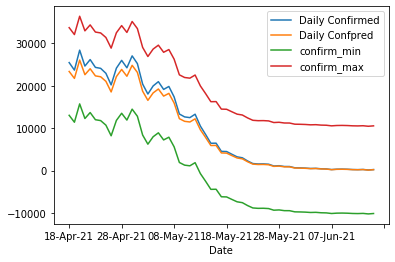

In [36]:
df.plot()

In [37]:
df["Model Accuracy"] = round((1-MAPE),2)
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max,Model Accuracy
Date,,,,,
18-Apr-21,25462,23364.550781,13027.439453,33701.664062,0.91
19-Apr-21,23686,21734.917969,11397.806641,32072.029297,0.91
20-Apr-21,28395,26055.828125,15718.716797,36392.937500,0.91
21-Apr-21,24638,22608.458984,12271.347656,32945.570312,0.91
22-Apr-21,26169,24013.285156,13676.173828,34350.398438,0.91
23-Apr-21,24331,22326.759766,11989.648438,32663.871094,0.91
24-Apr-21,24103,22117.550781,11780.439453,32454.662109,0.91
25-Apr-21,22933,21043.976562,10706.865234,31381.087891,0.91
26-Apr-21,20201,18537.132812,8200.021484,28874.244141,0.91


In [38]:
df1= pd.DataFrame( columns =['RMSE','MAE','ST_DEV'])
print("\nPandas DataFrame: ")
df1


Pandas DataFrame: 


,RMSE,MAE,ST_DEV


In [39]:

df1.loc[:,"ST_DEV"]=stdev
df1

,RMSE,MAE,ST_DEV


In [40]:
MAE

843.1257522065761